# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [4]:
! git clone https://www.github.com/LexiVanMetre/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 40 (delta 9), reused 5 (delta 5), pack-reused 26
Receiving objects: 100% (40/40), 5.69 MiB | 10.34 MiB/s, done.
Resolving deltas: 100% (10/10), done.


**Q1.** *Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.*

   **1. Read the abstract. What is this paper about?**

 The paper discusses the importance of effective and easy data cleaning, specifically data tidying.


  **2. Read the introduction. What is the "tidy data standard" intended to accomplish?**

The idea of the tidy data standard is to organize data values with a specific structured dataset in tidy, that way one can easily clean data because one does not have to start from scratch everytime they do so: "The tidy data standard has been designed to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together”.

**3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**

The first sentence means that even if the data itself is not clean or consistent, tidy datasets provide a standardized way to link the structure of a dataset (its physical layout) with its semantics (its meaning). In the second sentence, the author is trying to allude to the fact that variables and observations are easy to distinguish from one another, but are hard to define within their own category. However, this can be tricky as rows and columns are able to be switched at any moment. However, when trying to define a variable, you can’t look at a value and immediately know what that value is representing. For example, home phone and work phone we could treat them as two different variables; however, in a fraud detection case we would want the number type in order to classify a phone number to one person. It is easier to describe relationships between variables than between rows, and it is easier to make comparisons between groups of observations than between groups of columns. Observations can have multiple layers, this is how it can be hard to easily define them.

**4. Read Section 2.2. How does Wickham define values, variables, and observations?**

Wickham defines values as either qualitative data (strings) or quantitative data (numbers) found in a dataset, a variable has values that measure the same underlying attribute (like height), and an observation contains all values measured on the same unit (like a personal id).

**5. How is "Tidy Data" defined in section 2.3?**

Tidy Data is a standard way of mapping the meaning of a dataset to its structure. In tidy data: each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

**6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**

The five most common problems with messy datasets are as follows: one column headers are values, not variable names, two multiple variables are stored in one column, three variables are stored in both rows and columns, four multiple types of observational units are stored in the same table, and five a single observational unit is stored in multiple tables.
The data in Table 4 is messy because each column did not represent a variable and each row did not represent an observation. When you melt the dataset by adding religion as a colvar, and creating two columns called income and frequency to create variable columns.
“Melting” a dataset means turning columns into rows. (It usually either widens the data table or makes the data table taller).

**7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?**

Table 11 is specifically messy because of missing data that should be implicit, like plotting N/A data for months that do not have 31 days; however, table 12 is tidy and “molten” because it allows each row to represent the meteorological measurements for a single day, and the two measures variables (tmin and tmax) are represented as columns now instead of in the column called element.

**8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?**

The “chicken-and-egg” problem with tidy data is if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. In the future, Wickham hopes there are other frameworks that make cleaning data tasks easier, which will further progress the subject of data wrangling.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [5]:
import pandas as pd
import numpy as np


In [7]:
# Question 1: Cleaning Price Variable
airbnb_data = pd.read_csv('./assignment2/data/airbnb_hw.csv')
airbnb_data['Price'] = airbnb_data['Price'].str.replace('[^\d]', '', regex=True).astype(float)
missing_price_count = airbnb_data['Price'].isna().sum()
print("missing_price_count:", missing_price_count)
print(airbnb_data['Price'])

missing_price_count: 0
0        145.0
1         37.0
2         28.0
3        199.0
4        549.0
         ...  
30473    300.0
30474    125.0
30475     80.0
30476     35.0
30477     80.0
Name: Price, Length: 30478, dtype: float64


In [39]:
# Question 2: Cleaning the Type variable
sharks_data = pd.read_csv('./assignment2/data/sharks.csv')
#print(sharks_data.info())
#print(sharks_data.head(10))

#print(sharks_data['Type'].nunique())
#print(sharks_data['Type'].unique())

sharks_data['Type'] = sharks_data['Type'].replace('nan', np.nan)
sharks_data['Type' + '_nan'] = sharks_data['Type'].isnull()

print("Missing Count", sum(sharks_data['Type_nan']))
print(sharks_data[sharks_data['Type_nan'] == True])
sharks_data = sharks_data.dropna(subset = ['Type'])

print(sharks_data["Type"].unique())

Missing Count 5
      index   Case Number                  Date    Year Type    Country  \
239     239  2017.09.15.a           15-Sep-2017  2017.0  NaN      SAMOA   
537     537    2015.07.27           27-Jul-2015  2015.0  NaN  AUSTRALIA   
4087   4087           NaN                   NaN     NaN  NaN        NaN   
5025   5025  1936.09.11.R  Reported 11-Sep-1936  1936.0  NaN    VIETNAM   
5864   5864  1890.03.03.R  Reported 03-Mar-1890  1890.0  NaN     CEYLON   

              Area          Location           Activity           Name  ...  \
239   Upolu Island         Nofoali’i            Fishing           male  ...   
537       Victoria  Tyrendarra Beach            Surfing           male  ...   
4087           NaN               NaN                NaN            NaN  ...   
5025           NaN            Saigon  Wreck of a sampam         8 crew  ...   
5864           NaN               NaN             Diving  a pearl diver  ...   

     Unnamed: 247 Unnamed: 248 Unnamed: 249 Unnamed: 250 U

<ipython-input-39-71bdc97f65cf>:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks_data = pd.read_csv('./assignment2/data/sharks.csv')


In [11]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [15]:
# Question 3: Clean the WhetherDefendantWasReleasedPretrial
! git clone https://www.github.com/DS3001/visualization
pretrial_data = pd.read_csv('./visualization/data/pretrial_data.csv') # Load the pretrial data
pretrial_data['released'] = pretrial_data['released'].replace('Yes', 1.0).replace('No', 0.0)
pretrial_data['released'] = pretrial_data['released'].replace('Unknown', np.nan)
print(pretrial_data['released'])
# this is using an already cleaned dataset


fatal: destination path 'visualization' already exists and is not an empty directory.
0        NaN
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
22981    1.0
22982    1.0
22983    1.0
22984    1.0
22985    1.0
Name: released, Length: 22986, dtype: float64


In [19]:
# Question 3: Clean the WhetherDefendantWasReleasedPretrial
df = df.rename(columns = {'BondAmountAtInitialContact':'bond',
                    'Defendant_IndigencyStatus':'is_poor',
                    'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp':'case_type',
                    'WhetherDefendantWasReleasedPretrial':'released'}) # Rename variables
df['age'] = df['Defendant_Age'] # Creating a new variable called age without replacing Defendant_Age
print(df['released'].unique(), '\n')

df['released'] = df['released'].replace(9, np.nan)
df['released'] = df['released'].replace('Yes', 1.0).replace('No', 0.0)
df['released'] = df['released'].replace('Unknown', np.nan)
print(df['released'])

[9 0 1] 

0        NaN
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
22981    1.0
22982    1.0
22983    1.0
22984    1.0
22985    1.0
Name: released, Length: 22986, dtype: float64


In [37]:
# Question 4: Cleaning the ImposedSentenceAllChargeInContactEvent by looking at the SentenceTypeAllChargesAtConvictionInContactEvent
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(' ', '0')
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].astype(float)

#print(df['ImposedSentenceAllChargeInContactEvent'].unique())
#print(pd.crosstab(df['SentenceTypeAllChargesAtConvictionInContactEvent'], df['ImposedSentenceAllChargeInContactEvent']))

df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = 0
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'].astype(int) < 12, 'SentenceTypeAllChargesAtConvictionInContactEvent'] = 1
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'].astype(int) >= 12, 'SentenceTypeAllChargesAtConvictionInContactEvent'] = 1
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'] = 0
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = 0

#print(df['ImposedSentenceAllChargeInContactEvent'].isna().sum())
#print(df['ImposedSentenceAllChargeInContactEvent'].unique())

# Summary: I made sure that values in Sentence Type 1 and Sentence Type 2 did not overlap.

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [43]:
# 1. load in the data
df = pd.read_csv('./assignment2/data/college_completion.csv')

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# 2. Dimensions of the data
print("Dimensions of the data:", df.shape)
print("Number of observations:", len(df))
print("Variables included:", df.columns)
print(df.head())

Dimensions of the data: (3798, 63)
Number of observations: 3798
Variables included: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_afte

In [46]:
# 3. Cross tabulate control and level
cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


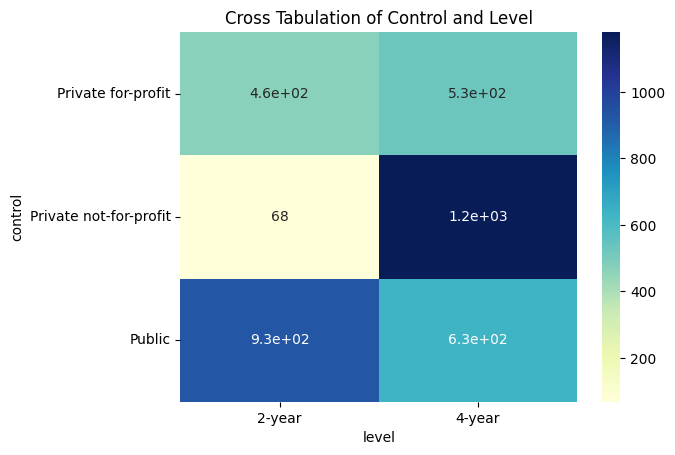

In [47]:
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title("Cross Tabulation of Control and Level")
plt.show()

For a four year institution, the highest number of institutions is the ones that are private and not for-profit, next if the public institutions, and finally it is the private for-profit institutions. For 2 year institutions, the highest number of institutions falls in the public category, next following the private for-profit, and finally a few number of private not-for-profit universities. It seems that 2-year institutions and 4 year institutions have almost an inverse relationship when it comes to the control.

Text(0.5, 1.0, 'Histogram and KDE Plot')

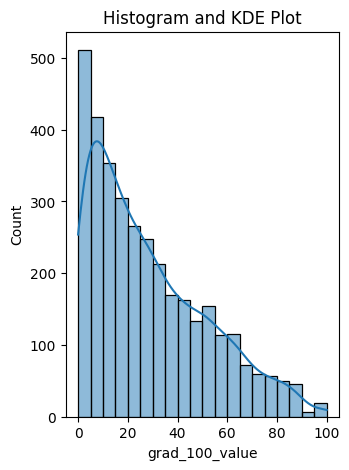

In [48]:
# 4. Histogram, KDE, Boxplot, and statistical description for grad_100_value
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['grad_100_value'], bins=20, kde=True)
plt.title("Histogram and KDE Plot")

Text(0.5, 1.0, 'Boxplot')

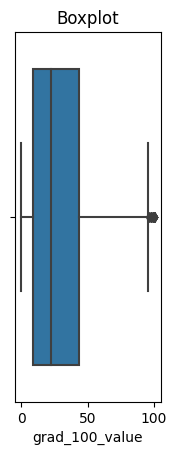

In [49]:
plt.subplot(1, 3, 2)
sns.boxplot(x=df['grad_100_value'])
plt.title("Boxplot")

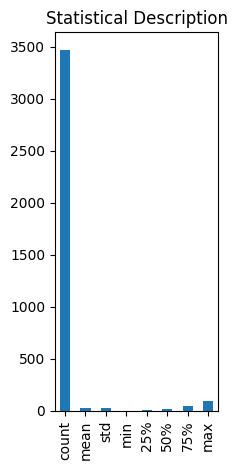

In [50]:
plt.subplot(1, 3, 3)
df['grad_100_value'].describe().plot(kind='bar')
plt.title("Statistical Description")
plt.tight_layout()
plt.show()

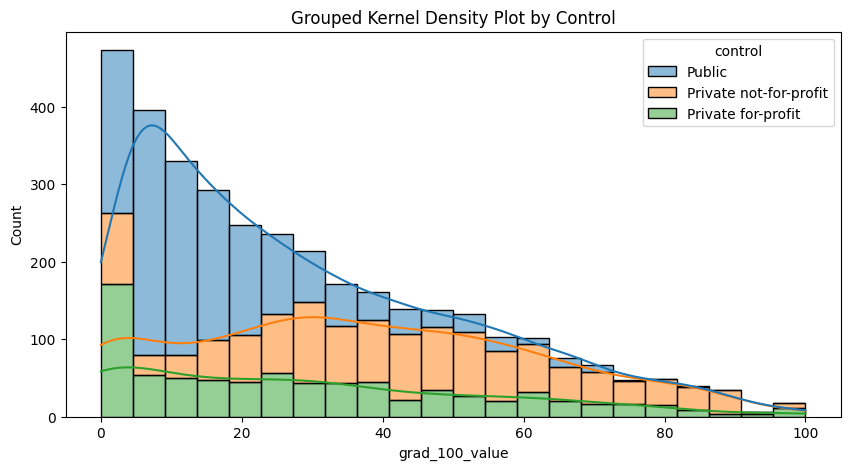

In [51]:
# 5. Grouped kernel density plot by control and level
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='grad_100_value', hue='control', multiple="stack", common_norm=False, kde=True)
plt.title("Grouped Kernel Density Plot by Control")
plt.show()

There are more colleges that have lower graduation values than there are of colleges that have 100 percent graduation rates. The private not for profit control has the highest number of 100 percent graduation rates. Public control has the highest number of lower graduation rates.

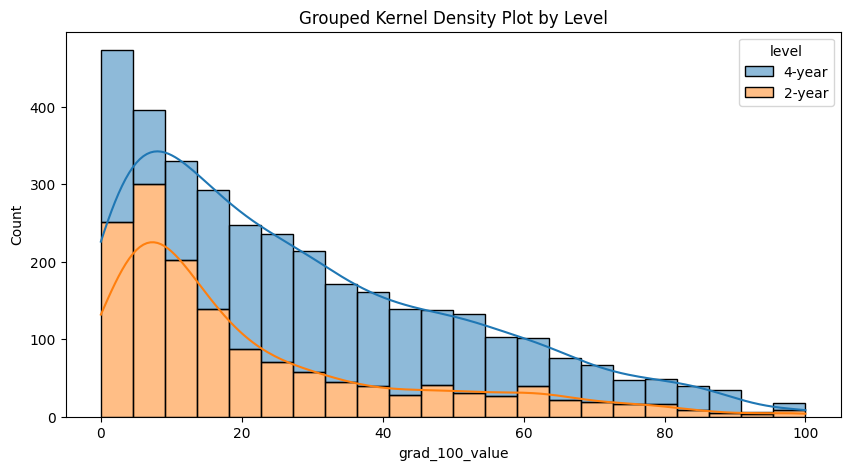

In [52]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='grad_100_value', hue='level', multiple="stack", common_norm=False, kde=True)
plt.title("Grouped Kernel Density Plot by Level")
plt.show()

In [53]:
# Grouped calculations of statistical descriptions
grouped_stats = df.groupby(['level', 'control'])['grad_100_value'].describe()
print(grouped_stats)

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

In [60]:
# Institutions with the best graduation rates
best_institutions = grouped_stats[grouped_stats['mean'] == grouped_stats.groupby(['level', 'control'])['mean'].transform('max')]
print(best_institutions)

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

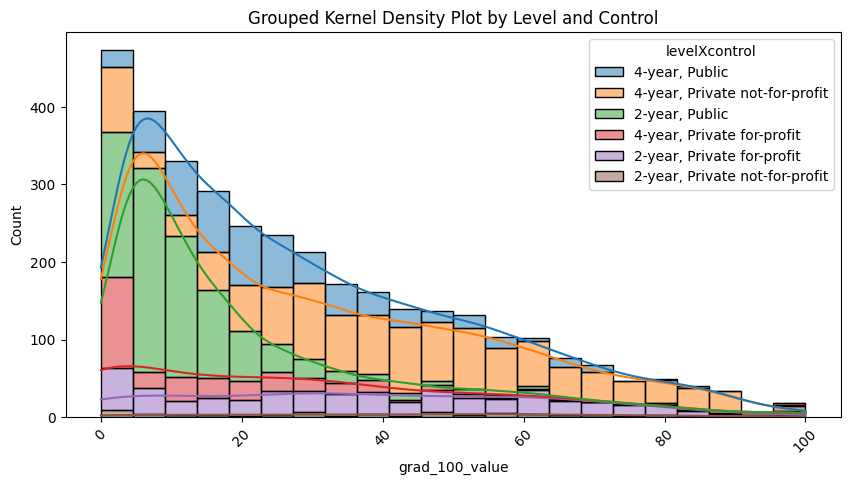

In [55]:
# 6. Interaction variable and grouped kernel density plot
df['levelXcontrol'] = df['level'] + ', ' + df['control']
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='grad_100_value', hue='levelXcontrol', multiple="stack", common_norm=False, kde=True)
plt.title("Grouped Kernel Density Plot by Level and Control")
plt.xticks(rotation=45)
plt.show()

Which institutions appear to have the best graduation rates?
4 year and 2 year institutions that are private not for profit based on the mean have the highest gradtion rates. If you compare the number of students that attend these universities, it is clear that 4 year institutions that are not for profit have the highest graduation rates.

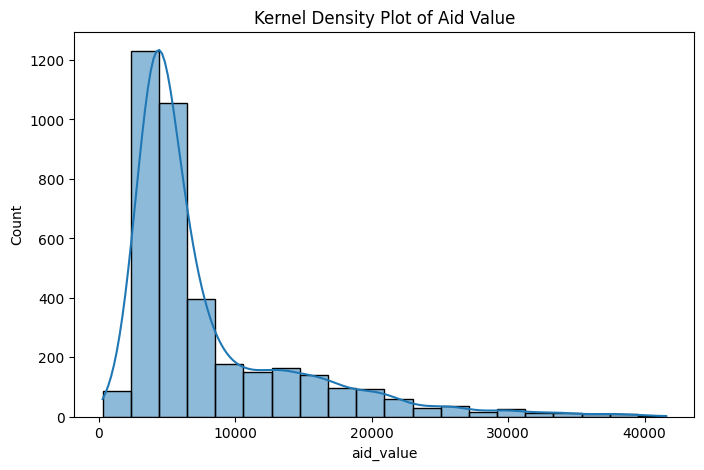

In [56]:
# 7. Kernel density plot of aid_value
plt.figure(figsize=(8, 5))
sns.histplot(df['aid_value'], bins=20, kde=True)
plt.title("Kernel Density Plot of Aid Value")
plt.show()

What explains the bi-modal nature of the graph?
There are two counts of different types of aid_value that are given out the most in institutions, which explains why it is bimodal.

In [57]:
# Grouped calculations of statistical descriptions for aid_value
grouped_aid_stats = df.groupby(['level', 'control'])['aid_value'].describe()
print(grouped_aid_stats)

                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.

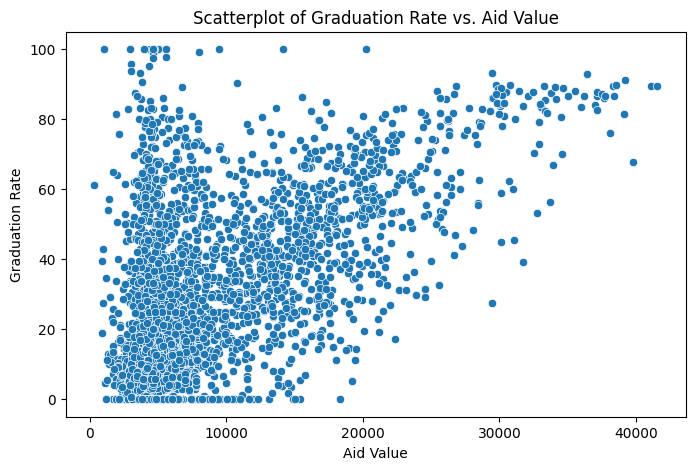

In [58]:
# 8. Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(8, 5))
sns.scatterplot(x='aid_value', y='grad_100_value', data=df)
plt.title("Scatterplot of Graduation Rate vs. Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.show()

There seems to be a relationship that when Aid Value is higher, the graduation rate also seems to be higher.

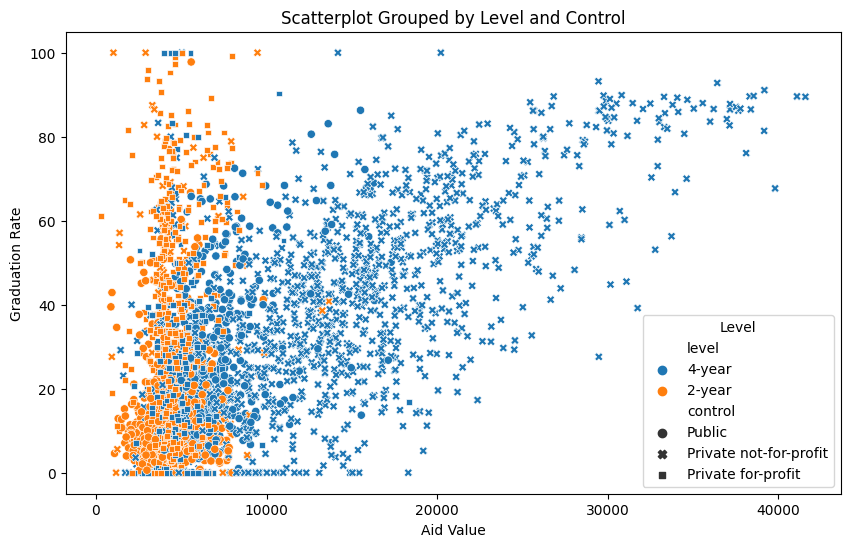

In [59]:
# Scatterplot grouped by level and control
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', hue='level', style='control', data=df)
plt.title("Scatterplot Grouped by Level and Control")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.legend(title="Level")
plt.show()

When aid value is sorted by type of intitution, it is clear that 4 year institutions give greater amount of aid-value. This may be the case because you need to think about diving the total by each year and 2 year institutions only need to provide aid for two years instead of four. It also shows the relationship found in the previous graph. However, it is hard to compare the differences betweeen the institution based on public, private not for profit and private for profit based on the plot.

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.